In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris['feature_names']
target_names = iris.target_names

#2項分類のサンプルにするためsetosaを削除する
#X = X[y != 0]
#y = y[y != 0]
#y = y -1
#target_names = target_names[1:]

print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']
X_train.shape =  (120, 4)
y_train.shape =  (120,)
X_test.shape =  (30, 4)
y_test.shape =  (30,)


In [3]:
X_train_dataframe = pd.DataFrame(X_train, columns=feature_names)

y_label = []
for i in y_train:
    y_label.append(target_names[i])
y_train_dataframe = pd.DataFrame(y_label, columns=['result'])

train_dataframe = pd.concat([X_train_dataframe, y_train_dataframe], axis=1)

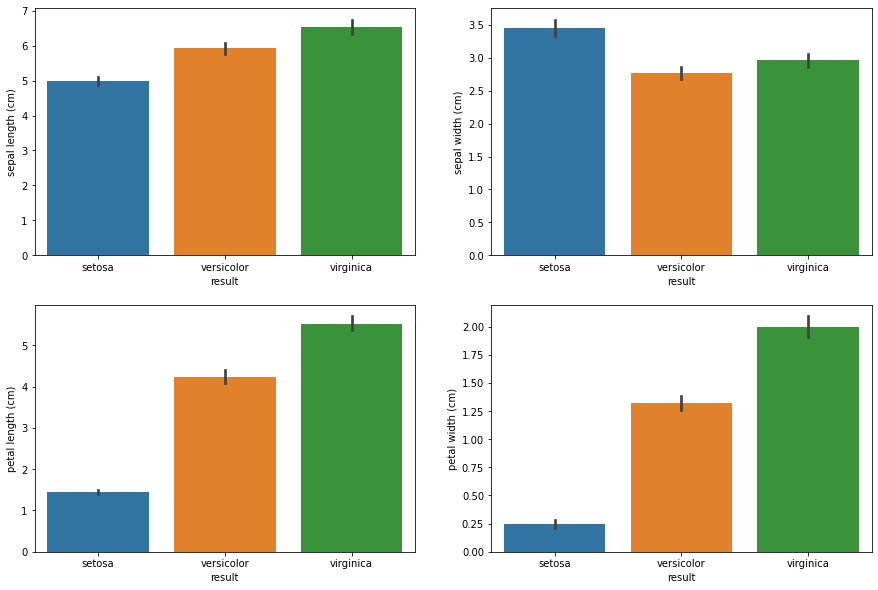

In [4]:
import seaborn as sns

fig = plt.figure(figsize=[15,10])
for i, f in enumerate(iris['feature_names']):
    fig.add_subplot(2, 2, i+1)
    sns.barplot(y=f, x='result', data= train_dataframe)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

1.0

In [6]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#model = sklearn.ensemble.RandomForestClassifier(n_estimators=2, max_depth = 3, random_state=2)
#model.fit(X_train, y_train)

#accuracy_score(y_test, model.predict(X_test))

In [17]:
from sklearn.ensemble import RandomForestClassifier
from eli5 import show_weights
m = RandomForestClassifier(n_estimators=2, max_depth = 3, random_state=2).fit(X_train, y_train)

show_weights(m, feature_names=feature_names)

Weight,Feature
0.6382 ± 0.7236,petal width (cm)
0.3618 ± 0.7236,petal length (cm)
0 ± 0.0000,sepal width (cm)
0 ± 0.0000,sepal length (cm)


In [18]:
from eli5.sklearn import explain_weights_sklearn
from eli5.formatters import format_as_dataframe, format_as_dataframes

explanation = explain_weights_sklearn(model, feature_names=feature_names)
format_as_dataframe(explanation)

In [19]:
import eli5
from sklearn.svm import SVC
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel

perm = PermutationImportance(model)
perm.fit(X_train, y_train)

sel = SelectFromModel(perm, threshold=0.05, prefit=True)
X_trans = sel.transform(X_train)

In [20]:
X_trans.shape

(120, 2)